In [47]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [45]:
my_file = fits.open('C:\\Users\\steph\\Downloads\\table_4LAC.fits')
with fits.open('C:\\Users\\steph\\Downloads\\table_4LAC.fits') as hdul:
    hdul.info()
    print(hdul[1].header)
    print(hdul[1].data['Source_Name'])
    print(hdul[1].data[0])
    dec = hdul[1].data['DEJ2000 ']
    ra = hdul[1].data['RAJ2000 ']

Filename: C:\Users\steph\Downloads\table_4LAC.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  4LAC AGNs     1 BinTableHDU    170   2863R x 38C   [18A, E, E, E, E, E, E, E, E, E, 18A, E, E, E, E, E, E, E, I, 6A, 30A, E, E, 20A, D, D, E, 20A, 30A, E, E, 6A, E, E, E, E, E, E]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  274 / length of dimension 1                          NAXIS2  =                 2863 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   38 / number of table fields                         TTYPE1  

In [61]:
def coordinate_trafo(radians):
    new_grid = np.copy(radians)
    new_grid[new_grid > np.pi] = new_grid[new_grid > np.pi] - 2. * np.pi
    return new_grid

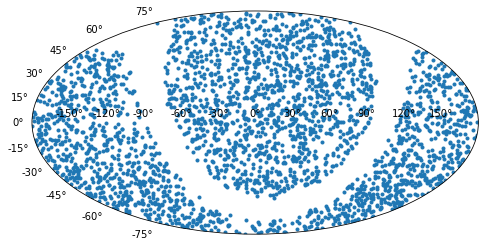

In [98]:
fig = plt.figure(figsize=(8, 6))
plt.subplot(111, projection="mollweide")
traf_RA = coordinate_trafo(np.deg2rad(ra))
plt.scatter(traf_RA, np.deg2rad(dec) * (-1.), marker='.')
plt.savefig("..\\pics\\heat_skymap.png", dpi=100)

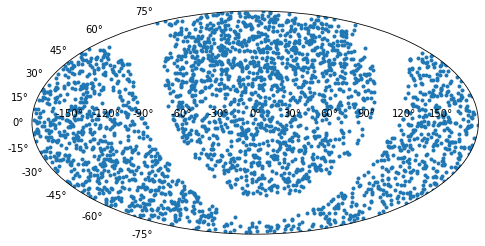

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
data = fits.getdata('C:\\Users\\steph\\Downloads\\table_4LAC.fits')
highlat_4lac_coordinates = SkyCoord(data["RAJ2000"], data["DEJ2000"], unit='deg')
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(highlat_4lac_coordinates.ra.radian%(2*np.pi)-np.pi, highlat_4lac_coordinates.dec.radian, marker=".")
plt.show()

In [87]:
np.array(highlat_4lac_coordinates.dec) / dec

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [96]:
np.array(highlat_4lac_coordinates.dec.radian) / np.deg2rad(dec)

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)